In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")






GPU is available


In [2]:
import os
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input

image_directory = '/kaggle/input/bald-classification-200k-images-celeba/Dataset/Train/Bald'
images = os.listdir(image_directory)
dataset = []
label = []
for i, image_name in enumerate(images[:2300]):
    image_path = os.path.join(image_directory, image_name)
    image = Image.open(image_path)
    image = image.resize((224, 224)) 
    image = preprocess_input(np.array(image)) 
    dataset.append(image)
    label.append(1)

image_directory2 = '/kaggle/input/bald-classification-200k-images-celeba/Dataset/Train/NotBald'
images2 = os.listdir(image_directory2)
for i, image_name in enumerate(images2[:2300]):
    image_path = os.path.join(image_directory2, image_name)
    image = Image.open(image_path)
    image = image.resize((224, 224)) 
    image = preprocess_input(np.array(image))  
    dataset.append(image)
    label.append(0)


In [3]:
len(dataset)



4600

In [4]:
label = np.array(label)

In [5]:
dataset = np.array(dataset)

In [6]:
dataset, label = shuffle(dataset, label, random_state=0)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(dataset, label, test_size=0.2, random_state=42)

In [8]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Add a custom top layer for binary classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Freeze the weights of the pre-trained VGG16 layers


# Fit the model on your training and validation data


58889256/58889256 [==============================] - 0s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/30
58/58 [==============================] - 28s 276ms/step - loss: 1.0005 - accuracy: 0.6109 - val_loss: 0.5645 - val_accuracy: 0.7554
Epoch 2/30
58/58 [==============================] - 9s 154ms/step - loss: 0.4930 - accuracy: 0.7872 - val_loss: 0.3961 - val_accuracy: 0.8391
Epoch 3/30
58/58 [==============================] - 9s 153ms/step - loss: 0.3699 - accuracy: 0.8443 - val_loss: 0.3270 - val_accuracy: 0.8663
Epoch 4/30
58/58 [==============================] - 9s 154ms/step - loss: 0.3101 - accuracy: 0.8758 - val_loss: 0.2942 - val_accuracy: 0.8826
Epoch 5/30
58/58 [==============================] - 9s 155ms/step - loss: 0.2780 - accuracy: 0.8880 - val_loss: 0.2628 - val_accuracy: 0.8913
Epoch 6/30
58/58 [==============================] - 10s 167ms/step - loss: 0.2543 - accuracy: 0.8976 - val_loss: 0.2520 - val_accuracy: 0.8967
Epoch 7/30
58/58 [==============================] - 9s 153ms/step - loss: 0.2385 - accuracy: 0.9008 - val_loss: 0.2469 - val_accuracy: 0.9000
Epoc

In [ ]:
tf.saved_model.save(model,'/kaggle/working/')

In [ ]:
len(testlabel)

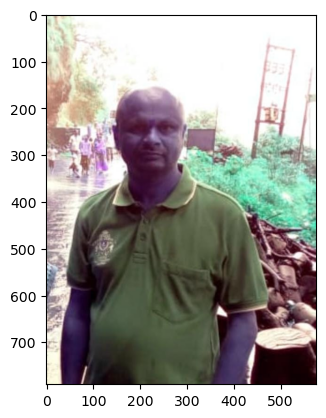

Bald


In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from PIL import Image
import numpy as np

# Load the model

path="/kaggle/input/personal-bald-testing/mama.jpeg"

 
img = cv2.imread(path)
plt.imshow(img)
plt.show()
img = Image.open(path)
img = img.resize((224, 224)) 
img_array = preprocess_input(np.array(img)) 
img_array = np.expand_dims(img_array, axis=0)
prediction = model(img_array)
temp=prediction[0][0]
if temp<0.5:
    print("Not Bald")
elif temp>0.5:
    print("Bald")

In [13]:
temp

<tf.Tensor: shape=(), dtype=float32, numpy=0.65578383>